In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import trange
plt.style.use(['science','grid'])

# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger
# import randomPubsInit

ModuleNotFoundError: No module named 'scienceplots'

In [ ]:
# simulation paramters
tau0 = 1
alpha = 1
beta = 3
rho = 0.2

# simulation counters
time = 0
timeMax = int(60*12)            # 12 hours in minutes - 3pm to 3am 
iter = 0
maxIter = 1000000
# population size of ants
popSize = 19

# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min


In [ ]:
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
# for pub in Pubs:
#     pub.popularity = 1

# init the pheromone matrix which is a 2D array with the size of the number of pubs
pheromoneMatrix = np.ones((len(Pubs), len(Pubs)))
pheromoneMatrix = pheromoneMatrix * tau0

# init the distance matrix D
distanceMatrix = np.zeros((len(Pubs), len(Pubs)))
for i in range(len(Pubs)):
    for j in range(i, len(Pubs)):
        distanceMatrix[i][j] = PCF.getDistance(Pubs[i], Pubs[j])
        #  print("i and j: ", i, j, " distance: ", distanceMatrix[i][j])

        distanceMatrix[j][i] = distanceMatrix[i][j]

# set the diagonal to 10e15
for i in range(len(Pubs)):
    distanceMatrix[i][i] = 10e15

# init the visibility matrix
visibilityMatrix = 1 / distanceMatrix

In [ ]:
# Ant colony

pathCollection = np.zeros((popSize, len(Pubs)))
pathLengthCollection = np.zeros((popSize, 1))
pathDurationCollection = np.zeros((popSize, 1))

minimumPathLength = int(10e15)
minimumPath = np.zeros(len(Pubs))
bestAnt = None


# clear the log file
Logger.clearLog()


## Main algorithm

while(iter < maxIter):
    iter += 1

    # give heartbeat
    if iter % 500 == 0:
        print("Iteration: ", iter)
        print("Pheromone  max: ", np.max(pheromoneMatrix))


    # Generate paths
    for i in range(popSize):
        # create an Ant
        ant = Ant.Ant(velocity=1)
        # set ant timer to 0
        ant.setTime(0)
        path = PCF.generatePath(pheromoneMatrix, visibilityMatrix, alpha, beta, Pubs, ant)
        #pathLength = PCF.getPathLength(path, Pubs)
        pathLength = PCF.getPathDuration(ant)
        pathDuration = PCF.getPathDuration(ant)

        # update the minimal path
        if pathLength < minimumPathLength:
            minimumPathLength = pathLength
            minimumPath = path
            minimumPathTimeTrajectory = ant.timedPath
            bestAnt = ant

            # inform the user
            # print('New minimum path found, in iteration: ', minimumPathLength, iter)
            # print("Path: ", minimumPath)
            # print("Name of pubs: ", [Pubs[pubID].pubName for pubID in minimumPath])
            # print("Pheromone  min: ", np.min(pheromoneMatrix))
            # print("Pheromone  max: ", np.max(pheromoneMatrix))
            # print("Pheromone  mean: ", np.mean(pheromoneMatrix))

            
            # log the new minimum path
            Logger.logBestPath(minimumPath, minimumPathTimeTrajectory, minimumPathLength)

            # if Plotting:
            #     # update scatter plot
            #     x = [Pubs[pubID].posX for pubID in minimumPath]
            #     y = [Pubs[pubID].posY for pubID in minimumPath]
            #     pubs_scatter.set_offsets(np.column_stack((x, y)))

            #     # update connection lines
            #     connection_lines.set_xdata(x)
            #     connection_lines.set_ydata(y)

            #     # update the pheromone matrix
            #     axs[1].imshow(pheromoneMatrix, cmap='hot', interpolation='nearest')

            #     # update the path length plot
            #     pathLengthPlot.set_xdata(np.append(pathLengthPlot.get_xdata(), iter*(popSize)+(i+1)))
            #     pathLengthPlot.set_ydata(np.append(pathLengthPlot.get_ydata(), minimumPathLength))
            #     axs[2].set_xlim(0, iter*(popSize)+(i+1))
            #     if minimumPathLength > LengthMax:
            #         LengthMax = minimumPathLength
            #         axs[2].set_ylim(0, int(minimumPathLength*1.1))


            #     # update the figure title to the minimal path length and iteration
            #     fig.suptitle('Pub Crawl, iteration: ' + str(iter) + ', path length: ' + str(minimumPathLength))

            #     plt.pause(0.01)


        # if path duration < 720 adjust roh value

        pathCollection[i,:] = path
        pathLengthCollection[i] = pathLength
        pathDurationCollection[i] = pathDuration

    # update the pheromone matrix
    #deltaPheromoneMatrix = PCF.getDeltaPheromoneMatrix(pathCollection, pathLengthCollection)
    deltaPheromoneMatrix = PCF.getDeltaPheromoneMatrix(pathCollection, pathDurationCollection)
    pheromoneMatrix = PCF.updatePheromoneMatrix(pheromoneMatrix, deltaPheromoneMatrix, rho)




KeyboardInterrupt: 

[[ 17.           0.        ]
 [  4.           9.78693285]
 [  1.          53.43869835]
 [  2.          67.87004131]
 [ 18.         215.08646095]
 [ 11.         221.81731861]
 [  5.         246.00095676]
 [ 12.         251.5363494 ]
 [ 13.         258.21997739]
 [ 14.         284.78266847]
 [  3.         410.61551106]
 [ 15.         415.87521464]
 [  0.         421.63872381]
 [  6.         427.38880782]
 [  8.         432.90445563]
 [  9.         440.28715933]
 [  7.         447.55720992]
 [ 10.         454.09382457]
 [ 16.         460.4504203 ]]


(0.0, 720.0)

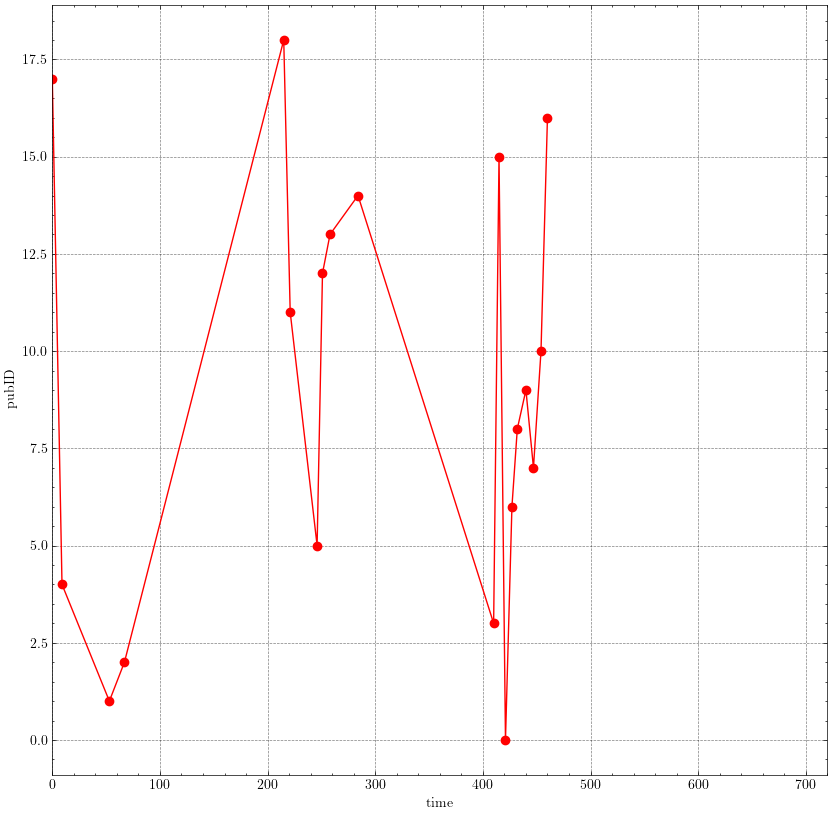

In [ ]:
# scatter plot to show the trajectory of the best ant over time, x-> time y-> pubID
fig, ax = plt.subplots(figsize=(10, 10))

bestPath = np.array(bestAnt.timedPath)


x = bestPath[:,1]
y = bestPath[:,0]
# convert to integer
x = x.astype(int)
y = y.astype(int)

print(bestPath)


ax.plot(x, y, c='r', marker="o")
ax.set_xlabel('time')
ax.set_ylabel('pubID')
ax.set_xlim(0, 720)

In [ ]:
# inform the user over the best found ant
print("Best ant: ", bestAnt)
print("Best path: ", minimumPath)
print("Best path length: ", minimumPathLength)
print("Best path time trajectory: ", minimumPathTimeTrajectory)

In [ ]:
# calculate 

# set diagonal to 0
for i in range(len(distanceMatrix)):
    distanceMatrix[i][i] = 0

plt.imshow(distanceMatrix)
print(np.max(distanceMatrix))